In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles

In [2]:
ngrams = ['bigram', 'trigram', 'fourgram']
version1 = 'simple'
version2 = 'normal'
ngramtypes = ['word', 'char']
freq_cutoff = 0
metrics = ['frequency']
outcomes = []

## Similarity

### Between sets

In [3]:
def prepare_data(ngram, version1, version2, freq_cutoff):
        data1 = pd.read_csv(f"Data/{version1}_{ngramtype}_{ngram}.csv", index_col = 0)
        data1 = data1[data1['frequency'] > (freq_cutoff - 1) ]
        data2 = pd.read_csv(f"Data/{version2}_{ngramtype}_{ngram}.csv", index_col = 0)
        data2 = data2[data2['frequency'] > (freq_cutoff - 1)]
        data = data1.merge(data2, on = ngram, how = 'outer')
        data = data.fillna(0)
        return data

In [4]:
def wilcoxon(data, metrics):
    outcome = []
    for metric in metrics:
        metric_x = f"{metric}_x"
        metric_y = f"{metric}_y"
        stat, pvalue = stats.wilcoxon(data[metric_x], data[metric_y])
        if pvalue < 0.05:
            sign = 'yes'
        else:
            sign = 'no'
        outcome.append([ngramtype, version1 + " vs " + version2, ngram, metric, pvalue, sign])
    return outcome

In [5]:
outcomes = []

for ngramtype in ngramtypes:
    for ngram in ngrams:
        print(ngram)
        res = wilcoxon(prepare_data(ngram, version1, version2, freq_cutoff), metrics)
        outcomes.extend(res)

bigram
trigram
fourgram
bigram
trigram
fourgram


In [6]:
outcomes_df = pd.DataFrame(outcomes, columns = ['ngram type','version', 'ngram', 'metric', 'pvalue', 'significant'])

In [7]:
outcomes_df

,ngram type,version,ngram,metric,pvalue,significant
0,word,simple vs normal,bigram,frequency,0.000000e+00,yes
1,word,simple vs normal,trigram,frequency,0.000000e+00,yes
2,word,simple vs normal,fourgram,frequency,0.000000e+00,yes
3,char,simple vs normal,bigram,frequency,8.563636e-24,yes
4,char,simple vs normal,trigram,frequency,3.660575e-276,yes
5,char,simple vs normal,fourgram,frequency,0.000000e+00,yes


In [8]:
print(outcomes_df.to_markdown())

|    | ngram type   | version          | ngram    | metric    |       pvalue | significant   |
|---:|:-------------|:-----------------|:---------|:----------|-------------:|:--------------|
|  0 | word         | simple vs normal | bigram   | frequency | 0            | yes           |
|  1 | word         | simple vs normal | trigram  | frequency | 0            | yes           |
|  2 | word         | simple vs normal | fourgram | frequency | 0            | yes           |
|  3 | char         | simple vs normal | bigram   | frequency | 8.56364e-24  | yes           |
|  4 | char         | simple vs normal | trigram  | frequency | 3.66058e-276 | yes           |
|  5 | char         | simple vs normal | fourgram | frequency | 0            | yes           |


### Between samples

In [9]:
def prepare_data(ngram, version, freq_cutoff):
        data1 = pd.read_csv(f"Data/{version1}_{ngramtype}_{ngram}_sample1.csv", index_col = 0)
        data1 = data1[data1['frequency'] > (freq_cutoff - 1) ]
        data2 = pd.read_csv(f"Data/{version2}_{ngramtype}_{ngram}_sample2.csv", index_col = 0)
        data2 = data2[data2['frequency'] > (freq_cutoff - 1)]
        data = data1.merge(data2, on = ngram, how = 'outer')
        data = data.fillna(0)
        return data

In [10]:
version1 = 'simple'
version2 = 'simple'

outcomes = []

for ngramtype in ngramtypes:
    for ngram in ngrams:
        print(ngram)
        res = wilcoxon(prepare_data(ngram, 'simple', freq_cutoff), metrics)
        outcomes.extend(res)

bigram
trigram
fourgram
bigram
trigram
fourgram


In [13]:
outcomes_df = pd.DataFrame(outcomes, columns = ['ngram type','version', 'ngram', 'metric', 'pvalue', 'significant'])
outcomes_df

,ngram type,version,ngram,metric,pvalue,significant
0,word,simple vs simple,bigram,frequency,0.831348,no
1,word,simple vs simple,trigram,frequency,0.340116,no
2,word,simple vs simple,fourgram,frequency,0.442082,no
3,char,simple vs simple,bigram,frequency,0.000022,yes
4,char,simple vs simple,trigram,frequency,0.023871,yes
5,char,simple vs simple,fourgram,frequency,0.550651,no


In [14]:
version1 = 'normal'
version2 = 'normal'
outcomes = []

for ngramtype in ngramtypes:
    for ngram in ngrams:
        print(ngram)
        res = wilcoxon(prepare_data(ngram, 'normal', freq_cutoff), metrics)
        outcomes.extend(res)

bigram
trigram
fourgram
bigram
trigram
fourgram


In [15]:
outcomes_df = pd.DataFrame(outcomes, columns = ['ngram type','version', 'ngram', 'metric', 'pvalue', 'significant'])
outcomes_df

,ngram type,version,ngram,metric,pvalue,significant
0,word,normal vs normal,bigram,frequency,0.162441,no
1,word,normal vs normal,trigram,frequency,0.619571,no
2,word,normal vs normal,fourgram,frequency,0.718637,no
3,char,normal vs normal,bigram,frequency,0.027550,yes
4,char,normal vs normal,trigram,frequency,0.021342,yes
5,char,normal vs normal,fourgram,frequency,0.044073,yes


## Overlap

In [16]:
def prepare_data_overlap(ngram, version1, version2, freq_cutoff):
        data1 = pd.read_csv(f"Data/{version1}_{ngramtype}_{ngram}.csv", index_col = 0)
        data1 = data1[data1['frequency'] > (freq_cutoff - 1) ]
        data2 = pd.read_csv(f"Data/{version2}_{ngramtype}_{ngram}.csv", index_col = 0)
        data2 = data2[data2['frequency'] > (freq_cutoff - 1)]
        data1 = data1[ngram].to_list()
        data2 = data2[ngram].to_list()
        return data1, data2

In [17]:
version1 = 'simple'
version2 = 'normal'

for ngramtype in ngramtypes:
    for ngram in ngrams:
        print(ngram)
        data1, data2 = prepare_data_overlap(ngram, version1, version2, freq_cutoff)
        len1 = len(set(data1))
        print(len1)
        len2 = (len(set(data2)))
        print(len2)
        overlap = set(data1).intersection(set(data2))
        print(len(overlap))
        print(f'Overlap {version1} : {((len(overlap)/len1)*100)}')
        print(f'Overlap {version2} : {((len(overlap)/len2)*100)}')

bigram
1773476
2205001
639383
Overlap simple : 36.05253186397786
Overlap normal : 28.996948300703718
trigram
4205198
4846608
762894
Overlap simple : 18.14169035560276
Overlap normal : 15.740782006714799
fourgram
5759336
6261211
551499
Overlap simple : 9.575739286612208
Overlap normal : 8.808184231452989
bigram
1924
1892
1796
Overlap simple : 93.34719334719335
Overlap normal : 94.9260042283298
trigram
22906
24662
19235
Overlap simple : 83.97363136296167
Overlap normal : 77.99448544319195
fourgram
119746
133330
93660
Overlap simple : 78.21555626075192
Overlap normal : 70.24675616890423


In [18]:
def venn(ngram, version1, version2):   
    data1 = pd.read_csv(f"Data/{version1}_{ngramtype}_{ngram}.csv", index_col = 0)
    data1 = data1[data1['frequency'] > (freq_cutoff - 1) ]
    data2 = pd.read_csv(f"Data/{version2}_{ngramtype}_{ngram}.csv", index_col = 0)
    data2 = data2[data2['frequency'] > (freq_cutoff - 1)]
    data_grams1 = data1[ngram].to_list()
    data_grams2 = data2[ngram].to_list()
    venn2([set(data_grams1), set(data_grams2)], 
    set_colors=('#3E64AF', '#3EAF5D'), 
    set_labels = (f'{ngram} {version1}', 
                    f'{ngram} {version2}'),
                      alpha=0.75)
    plt.title("Cut-off freqiencies at 0")
    venn2_circles([set(data_grams1), set(data_grams2)], lw=0.7)
    return plt

bigram


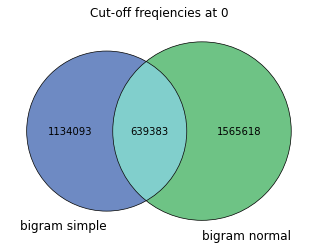

trigram


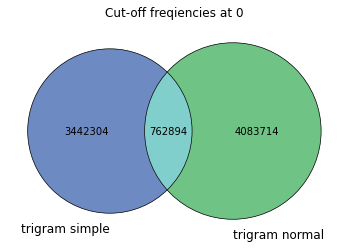

fourgram


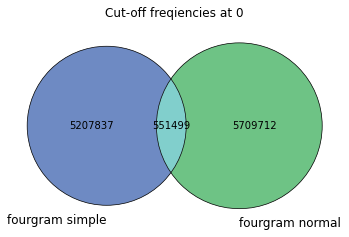

bigram


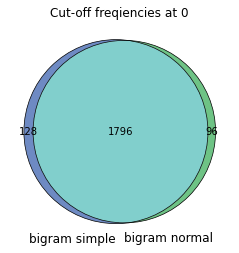

trigram


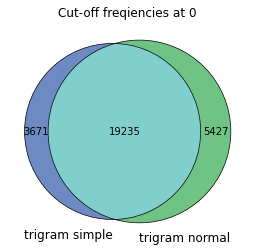

fourgram


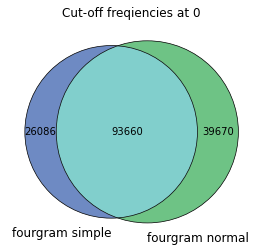

In [19]:
for ngramtype in ngramtypes:
    for ngram in ngrams:
        print(ngram)
        plt =  venn(ngram, version1, version2)
        plt.show()